<a href="https://colab.research.google.com/github/samtam0714/ML/blob/master/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')

In [ ]:
#View first fiew rows of the dataset
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
#Creating X and Y variables
X = dataset.drop('species', axis=1).values
y = dataset['species']

In [ ]:
#Load library for Training Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [ ]:
#Load library for scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

In [ ]:
#Print Best Score
MSE = [1 - x for x in k_scores]
best_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 4.


In [ ]:
#Create Optimal KNN model
classifier = KNeighborsClassifier(n_neighbors = 4)

In [ ]:
#Fit KNN Model
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['Setosa','Versicolor','Virginica']
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred,target_names=target_names)) 

[[11  0  0]
 [ 0  6  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        11
 Versicolor       0.75      1.00      0.86         6
  Virginica       1.00      0.85      0.92        13

avg / total       0.95      0.93      0.94        30



Text(0,0.5,'Mean Error')

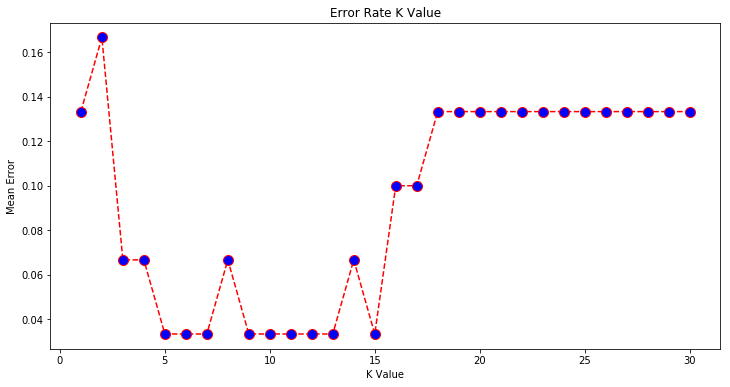

In [ ]:
#Alternative Method

error = []
for i in range(1, 31):  
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, y_train)
    pred_i = knn1.predict(X_test)
    error.append(np.mean(pred_i != y_test))
 
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 31), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

In [ ]:
#Create KNN model with 5
classifier2 = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
#Fit KNN Model with 5
classifier2.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
#Prediction with 5
y_pred2 = classifier2.predict(X_test)

In [ ]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['Setosa','Versicolor','Virginica']
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2,target_names=target_names)) 

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]
             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        11
 Versicolor       0.86      1.00      0.92         6
  Virginica       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30

